# <a  name = ""><font color = "brown"> Title 1</font></a>

## <a  name = ""><font color = "purple"> Title 2 </font></a>

### <font color = "green"> Title 3 </font>

#### <font color = "orange"> Title 4 </font>

##### <font color = "darkcyan"> Titltle 5 </font>

> **NOTE:** This is how we do it

<a href = #bottom  style = "text-decoration:none"> go to bottom</a></br>
<a name = "top"></a>

# <font color = "brown"> Content </font>

<a href = #a1  style = "text-decoration:none">  Generate classification dataset from sklearn</a>

<a href = #content2  style = "text-decoration:none"> content 2</a></br>

## <a  name = "a1"><font color = "purple"> Generate classification dataset from sklearn</font></a>

In [13]:
from sklearn.datasets import make_circles
n_samples = 1000 #number of samples 
#creating the circles 
x, y = make_circles(
    n_samples=n_samples,
    shuffle=True,
    noise=0.03,
    random_state=42
)

In [7]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

### <font color = "green"> Visualize the dataset </font>

In [18]:
import pandas as pd

In [32]:
circles_df = pd.DataFrame(data = {'x0': x[:,0], 'x1': x[:,1], 'y':y})
circles_df

,x0,x1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


<a href = #top  style = "text-decoration:none" > go to top</a></br>
<a name = "bottom"></a>

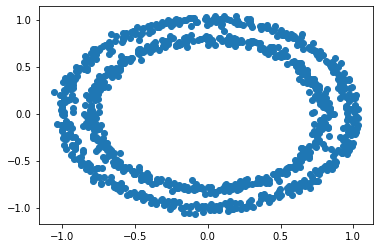

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c =y , cmap = plt.cm.rdyl)